# LAMA 2020 self-study 1: eigenvalues, eigenvectors, and numerical methods for advection equation

Let us consider the linear advection equation in 1D:
$$
\frac{\partial u}{\partial t}(t,u) + v \frac{\partial u}{\partial x}(t,u) =0
$$
on the unit interval in space, i.e., $x\in [0,1]$, and $t>0$.
The PDE is supplemented with the initial condition $u(0,x)=\bar{u}(x)$, $x\in [0,1]$, and periodic boundary conditions $u(t,0)=u(t,1)$, $t>0$.

After uniform discretizations in time and space, we arrive at two methods:
$$
u^{k+1}(x_j) = u^{k}(x_j) - c(u^{k}(x_j) - u^{k}(x_{j-1})),
$$
and
$$
u^{k+1}(x_j) = u^{k}(x_j) - c(u^{k}(x_{j+1}) - u^{k}(x_{j})),
$$
where $c$ is the dimensionless Courant number $c=v \tau/h$, where $\tau>0$ is the timestep and $h>0$ is the spatial mesh size.

We implement both methods and compare them on a problem with the initial condition $\bar{u}(x)=\sin(2\pi x)+\xi(x)$, where $\xi$ will model small random/numerical errors.

In [47]:
# we import all the packages we are going to need
# for visualization:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.animation
from IPython.display import HTML
# arrays:
import numpy as np

In [48]:
def ubar(x):
    # generate some random noise
    xi = 1.0E-04*np.random.normal(x.shape)
    return np.sin(2*np.pi*x) + xi

In [49]:
# spacial grid
m = 20
Omega = np.linspace(0,1,num=m,endpoint=False)
h = 1/m

In [50]:
# advection speed
v = 0.9

In [51]:
# time-discretization parameter
tau = h

In [52]:
# initial conditions evaluated on the spatial grid
u0 = ubar(Omega)

Let us now animate how the analytical solution $u(t,x) = \bar{u}(t-vx)$ looks like, for (discrete) times $\{0,\tau,2\tau,\dots\}$ up to ca. $T=3$ seconds:

In [53]:
# final time
T  = 3
# number of time steps needed to reach it, + 1 to store the initial condition
NT = int(np.ceil((T-0)/tau) + 1)

# analytical solution
def u_analytical(t,x):
    return ubar(t*v-x)

The animation itself is somewhat messy, but here is an example of how it can be done

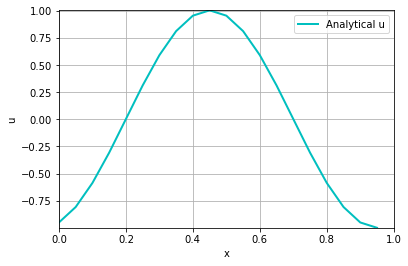

In [54]:
fig, ax = plt.subplots()
ax.set(xlim=(0, 1), ylim=(np.amin(u0), np.amax(u0)))
line    = ax.plot(Omega,u_analytical(0,Omega),color='c',lw=2,label='Analytical u')[0]
ax.grid(True)
ax.set_xlabel('x')
ax.set_ylabel('u')
ax.legend(loc='upper right')

animate = lambda k: line.set_ydata(u_analytical(k*tau,Omega))
ani     = matplotlib.animation.FuncAnimation(fig, animate, frames=NT)

HTML(ani.to_jshtml())

## Let us now see what numerical methods would produce

We begin by defining two finite difference operators for approximating the derivative $\partial/\partial x$:

In [55]:
# forward and backward difference operators; remember that u is periodic
def Delta_frw(u):
    # Delta u[j] = u[j+1]-u[j]
    return np.roll(u,-1)-u

def Delta_bkw(u):
    # Delta u[j] = u[j]-u[j-1]
    return u-np.roll(u,1)

Let us now run both numerical methods and store the output in $u_{frw}$ and $u_{bkw}$:

In [56]:
#preallocate the arrays filled with zeros
u_frw = np.zeros((NT,len(Omega)))
u_bkw = np.zeros((NT,len(Omega)))
# initialize the arrays (from the initial condition)
u_frw[0] = u0
u_bkw[0] = u0

# Courant number
c = v*tau/h
print("Courant number = %f" % c)

# begin the main time-integration loop
for k in range(NT-1):
    u_frw[k+1] = u_frw[k]-c*Delta_frw(u_frw[k])
    u_bkw[k+1] = u_bkw[k]-c*Delta_bkw(u_bkw[k])   

Courant number = 0.900000


It only remains to animate the results:

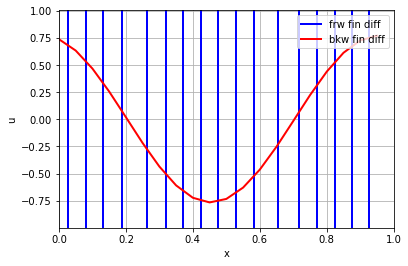

In [57]:
fig, ax = plt.subplots()
ax.set(xlim=(0, 1), ylim=(np.amin(u0), np.amax(u0)))
line_frw= ax.plot(Omega,u_frw[0],color='b',lw=2,label='frw fin diff')[0]
line_bkw= ax.plot(Omega,u_bkw[0],color='r',lw=2,label='bkw fin diff')[0]
ax.grid(True)
ax.set_xlabel('x')
ax.set_ylabel('u')
ax.legend(loc='upper right')
def animate(k):
    line_frw.set_ydata(u_frw[k])
    line_bkw.set_ydata(u_bkw[k])
ani     = matplotlib.animation.FuncAnimation(fig, animate, frames=NT)

HTML(ani.to_jshtml())

The goal of this self-study is to explain the very different behaviour of these two methods using eigenvalues of certain linear operators.